# Lab 09: Spatial Filter Basics
Name: **Raja Hasnain Anwar**<br>
Registration: **192135**

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Task 01

In [2]:
img = cv2.imread('smoothing.tif', 0)

Original


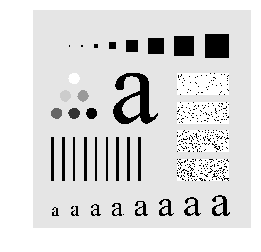

In [3]:
print('Original')
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

## Averaging & Smoothing

In [4]:
def smoothening(img, mask):
    size = mask.shape[0]//2
    averging_comp = np.sum(mask)
    
    out = img.copy()
    img = np.pad(img, size, 'constant', constant_values=0)
    
    for y in range(size, img.shape[0]-size):
        for x in range(size, img.shape[1]-size):
            
            pixels = img[y-size:y+size+1, x-size:x+size+1]
            
            out[y-size,x-size] = np.sum(np.multiply(pixels, mask/averging_comp))
            
    return out

## Results

Smooth


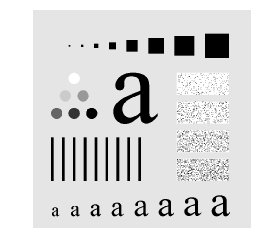

In [5]:
mask = np.ones((3,3))
smooth_img = smoothening(img,mask)

print('Smooth')
plt.axis('off')
plt.imshow(smooth_img, cmap='gray')
plt.show()

Smooth


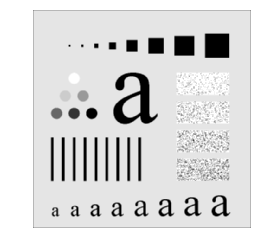

In [6]:
mask = np.ones((5,5))
smooth_img = smoothening(img,mask)

print('Smooth')
plt.axis('off')
plt.imshow(smooth_img, cmap='gray')
plt.show()

Smooth


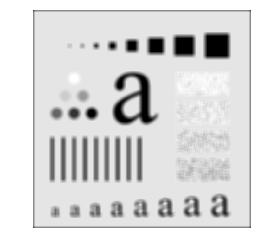

In [7]:
mask = np.ones((15,15))
smooth_img = smoothening(img,mask)

print('Smooth')
plt.axis('off')
plt.imshow(smooth_img, cmap='gray')
plt.show()

Smooth


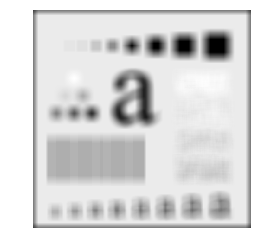

In [8]:
mask = np.ones((35,35))
smooth_img = smoothening(img,mask)

print('Smooth')
plt.axis('off')
plt.imshow(smooth_img, cmap='gray')
plt.show()

## Weighted Average

Smooth


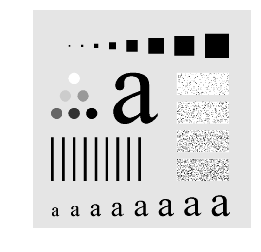

In [9]:
mask = np.array( [[1,2,1],[2,4,2],[1,2,1]] ,dtype=np.uint8)

smooth_img = smoothening(img,mask)

print('Smooth')
plt.axis('off')
plt.imshow(smooth_img, cmap='gray')
plt.show()

This weighted average is very similar to 3x3 average. The difference is that the image is a little sharper with better edges.

# Task 02

In [10]:
def gaussian_kernel(shape=(3,3),sigma=0.5):
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

Smooth


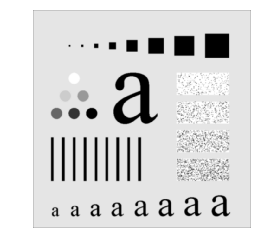

In [11]:
mask = gaussian_kernel((7,7),1.4)
smooth_img = smoothening(img, mask)

print('Smooth')
plt.axis('off')
plt.imshow(smooth_img, cmap='gray')
plt.show()

Smooth


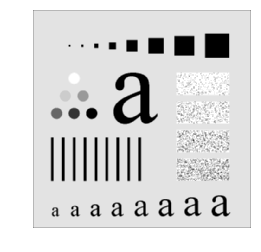

In [12]:
mask = gaussian_kernel((5,5),10.4)
smooth_img = smoothening(img, mask)

print('Smooth')
plt.axis('off')
plt.imshow(smooth_img, cmap='gray')
plt.show()

The image gets more blur the sigma is increased.

# Task 03

Original


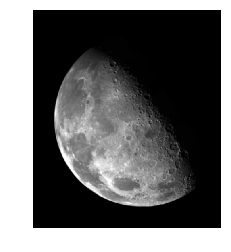

In [13]:
img = cv2.imread('unsharpmasking.tif', 0)

print('Original')
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

Sharp


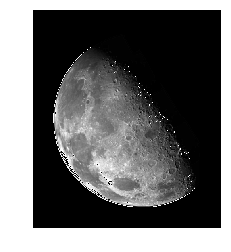

In [14]:
mask = np.array( [[1,2,1],[2,4,2],[1,2,1]] ,dtype=np.uint8)
blurred = smoothening(img,mask)

strength = 2

enhanced_image = img + strength * (img - blurred) # unsharp mask

print('Sharp')
plt.axis('off')
plt.imshow(enhanced_image, cmap='gray')
plt.show()

Sharp


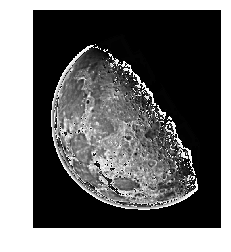

In [15]:
mask = np.ones((15,15))
blurred = smoothening(img,mask)

strength = 2

enhanced_image = img + strength * (img - blurred) # unsharp mask

print('Sharp')
plt.axis('off')
plt.imshow(enhanced_image, cmap='gray')
plt.show()

Sharp


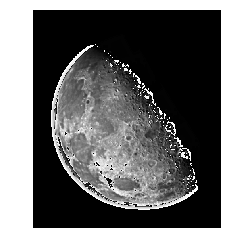

In [16]:
mask = np.ones((15,15))
blurred = smoothening(img,mask)

strength = 1

enhanced_image = img + strength * (img - blurred) # unsharp mask

print('Sharp')
plt.axis('off')
plt.imshow(enhanced_image, cmap='gray')
plt.show()

Here the image from averaging looks more sharp because it gives importance to all the pixels around center pixel and results in a smooth transition of colors. When this smooth transition is subtracted from the image, we get a sharp mask.

# Task 04

Original


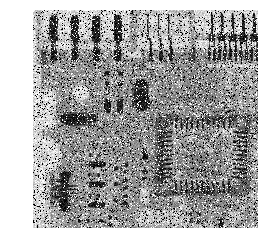

In [17]:
img = cv2.imread('saltandpaper.tif',0)

print('Original')
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

Median blur is best suited to remove salt and pepper noise.

In [18]:
def median_blur(img, filter_size):
    size = filter_size//2
    
    out = img.copy()
    img = np.pad(img, size, 'constant', constant_values=0)
    
    for y in range(size, img.shape[0]-size):
        for x in range(size, img.shape[1]-size):
            
            pixels = img[y-size:y+size+1, x-size:x+size+1]
            pixels = np.sort(pixels, axis=None)
            out[y-size,x-size] = pixels[ filter_size**2 // 2 ]
            
    return out

Clean


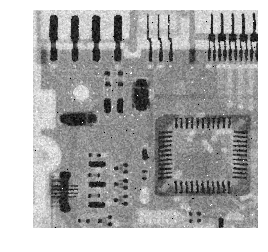

In [19]:
mask_size = 3
clean = median_blur(img, mask_size)

print('Clean')
plt.axis('off')
plt.imshow(clean, cmap='gray')
plt.show()

# Task 05

Original


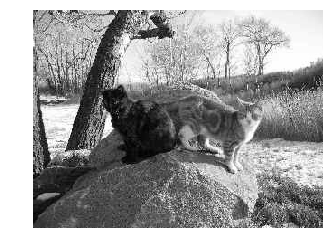

In [20]:
img = cv2.imread('two_cats.jpg', 0)

print('Original')
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

In [21]:
def detector(img, mask):
    size = mask.shape[0]//2
    
    out = img.copy()
    img = np.pad(img, size, 'constant', constant_values=0)
    
    for y in range(size, img.shape[0]-size):
        for x in range(size, img.shape[1]-size):
            
            pixels = img[y-size:y+size+1, x-size:x+size+1]
            
            out[y-size,x-size] = np.sum(np.multiply(pixels, mask))/3
            
    return out

Horizontal Edges


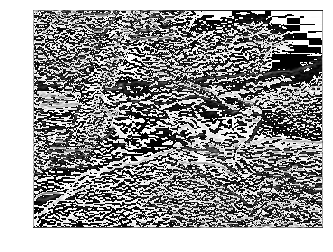

In [22]:
mask = np.array( [[1,1,1],[0,0,0],[-1,-1,-1]] ,dtype=np.uint8)
horizontal = detector(img, mask)

print('Horizontal Edges')
plt.axis('off')
plt.imshow(horizontal, cmap='gray')
plt.show()

Vertical Edges


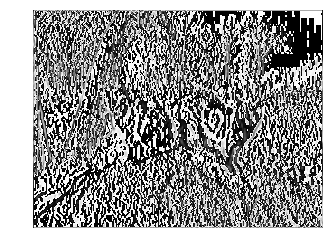

In [23]:
mask = np.array( [[-1,0,1],[-1,0,1],[-1,0,1]] ,dtype=np.uint8)
vertical = detector(img, mask)

print('Vertical Edges')
plt.axis('off')
plt.imshow(vertical, cmap='gray')
plt.show()

Combined Edges


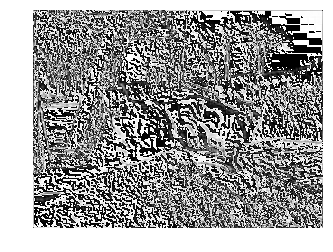

In [24]:
print('Combined Edges')
plt.axis('off')
plt.imshow(vertical+horizontal, cmap='gray')
plt.show()